In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [52]:
path_to_clean_df='../../data/clean.csv'
df=pd.read_csv(path_to_clean_df)

### Number of songs per decade: ###

decade
2010.0    185207
2000.0     93328
2020.0     53525
1990.0     42352
1980.0     19370
1970.0     16073
1960.0      9451
1950.0      1746
Name: count, dtype: int64


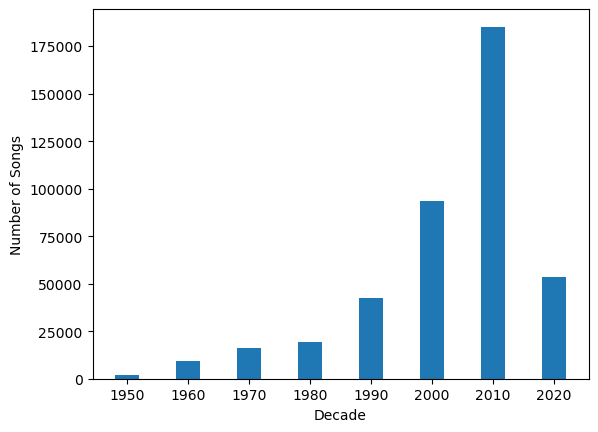

In [53]:
yrs=df['decade'].value_counts()
print(yrs)
plt.bar(yrs.index,yrs,width=4)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.show()

### Number of songs per genre ###

main_genre
pop            85041
rock           67057
country        53170
alternative    47172
pop rock       39491
punk           16031
metal          11291
rap            11073
soul            7333
jazz            6863
reggae          3812
electronic      2810
Name: count, dtype: int64


Text(0, 0.5, 'Main Genre')

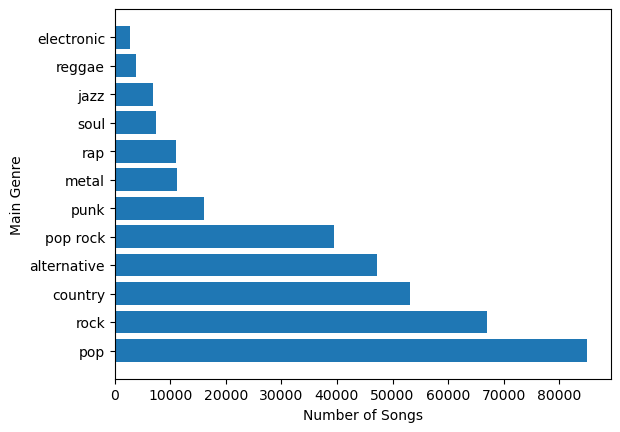

In [54]:
grs=df['main_genre'].value_counts()
print(grs)
plt.barh(grs.index,grs)
plt.xlabel('Number of Songs')
plt.ylabel('Main Genre')

### Number of songs per number of sections: ###

In [55]:
secs=df['num_sections'].value_counts()
print(secs)

num_sections
1      186663
7       56550
6       50487
8       46152
5       33698
        ...  
42          1
203         1
140         1
47          1
36          1
Name: count, Length: 125, dtype: int64


There are some crazy outliers, some songs have 100+ sections. Plot only those $\leq$ 20 sections, which end up comprising more than 99% of the data.

num_sections
1     186663
7      56550
6      50487
8      46152
5      33698
9      28751
4      22365
10     15655
3      11093
2       8897
11      7953
12      4056
13      2069
14      1087
15       575
16       424
17       207
18       147
19        74
20        74
Name: count, dtype: int64
476977


Text(0.5, 0, 'Number of Sections')

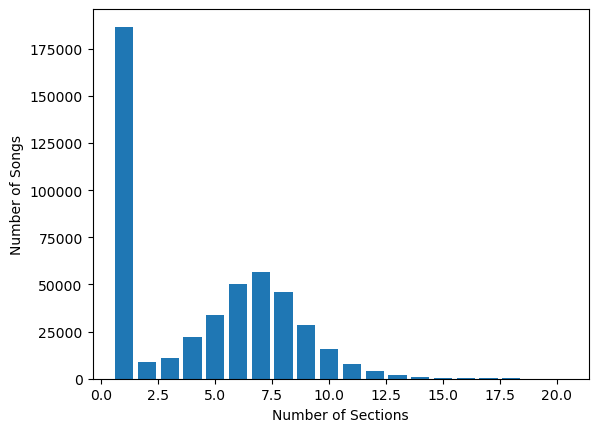

In [56]:
#bar plot
secs=df[df['num_sections']<=20].num_sections.value_counts()
print(secs)
print(secs.sum()) #accounts for over 99.9% of data
plt.bar(secs.index,secs)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Sections')

From this, it's apparent that a great deal of the time, those who contributed chords didn't bother to separate their songs into sections. Therefore, these section labels aren't reliable and no further analysis involving sections should be done.

### Songs per total unique chords: ###

In [57]:
uchords=df.tot_unique_chords.value_counts().sort_index()
print(uchords)

tot_unique_chords
2       6022
3      41745
4      92418
5      86944
6      71201
       ...  
112        1
113        2
114        1
125        1
165        1
Name: count, Length: 102, dtype: int64


Again, some huge outliers. Limit plot to songs with $\leq$ 30 unique chords, which account for over 99.5% of all data.

tot_unique_chords
4     92418
5     86944
6     71201
7     50136
3     41745
8     34172
9     23587
10    17006
11    12212
12     9045
13     6667
2      6022
14     5154
15     3868
16     3000
17     2455
18     1935
19     1561
20     1268
21     1057
22      835
23      720
24      589
25      508
26      416
27      342
28      336
29      250
30      226
Name: count, dtype: int64
475675


Text(0.5, 0, 'Number of Unique Chords')

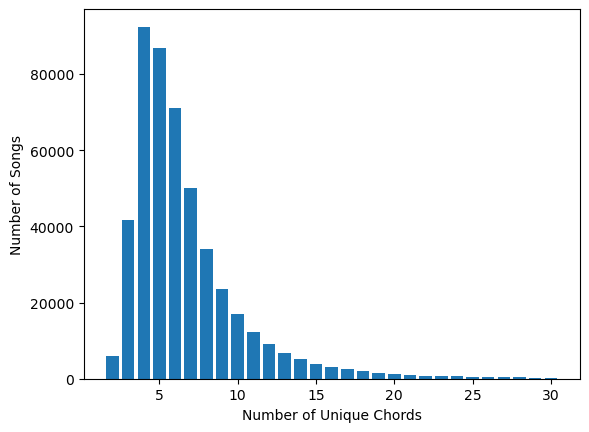

In [58]:

uchords=df[df['tot_unique_chords']<=30].tot_unique_chords.value_counts()
print(uchords)
print(uchords.sum()) #accounts for over 99.5% of data
plt.bar(uchords.index,uchords)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Unique Chords')

<Figure size 640x480 with 0 Axes>

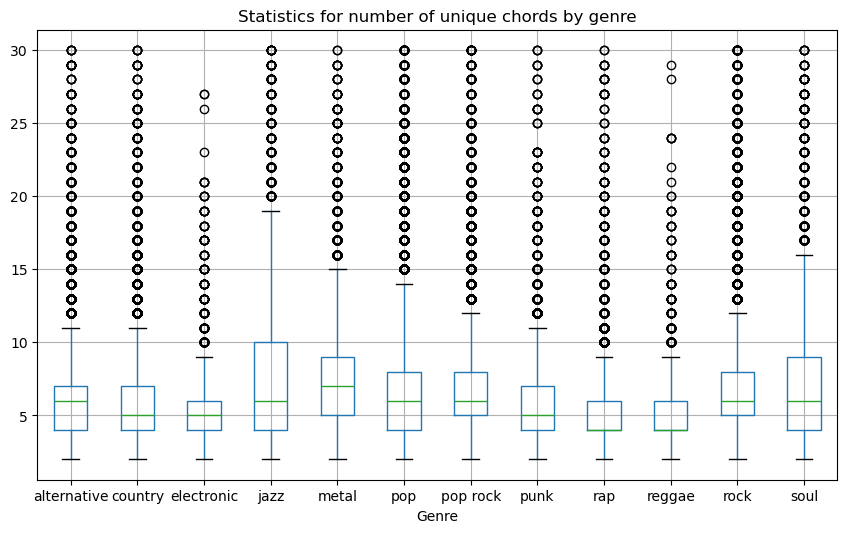

In [59]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of unique chords by genre')
plt.show()

In [60]:
#mean number of unique chords per genre
df[['tot_unique_chords','main_genre']].groupby('main_genre').mean()

,tot_unique_chords
main_genre,
alternative,6.230730
country,5.739101
electronic,5.648754
jazz,8.505027
metal,7.698698
pop,6.854917
pop rock,7.300651
punk,5.917597
rap,5.353834


Rap, reggae and electronic all have low medians/3rd quartiles and means. Metal, soul and jazz have the highest medians/3rd quartiels and means.

<Figure size 640x480 with 0 Axes>

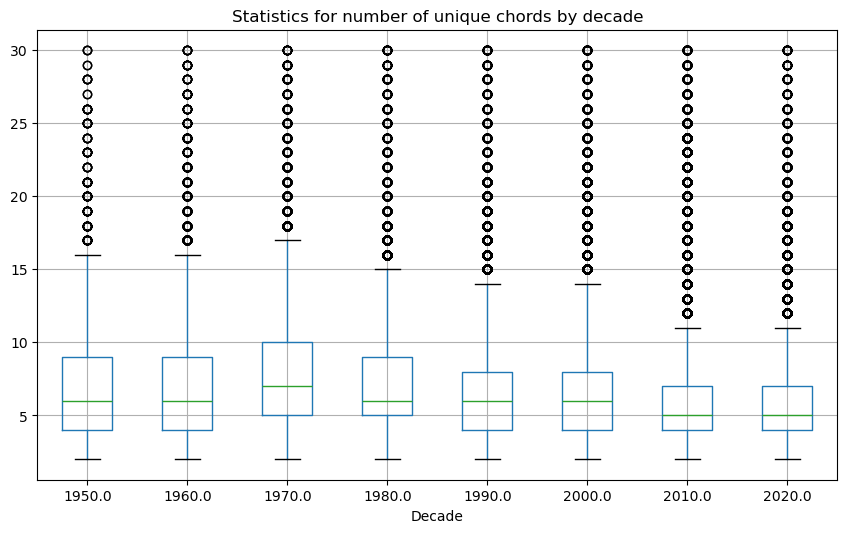

In [61]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of unique chords by decade')
plt.show()

In [62]:
#mean number of unique chords per decade
df[['tot_unique_chords','decade']].groupby('decade').mean()

,tot_unique_chords
decade,
1950.0,7.764605
1960.0,7.635277
1970.0,8.194052
1980.0,7.679040
1990.0,7.134114
2000.0,6.682593
2010.0,6.353513
2020.0,6.467707


The means and interquartile distributions for post-2000's music seem to be lower than the rest.

### Songs by total number of chords: ###

In [63]:
tchords=df.tot_chords.value_counts().sort_index()
print(tchords)


tot_chords
6        583
7        658
8       1001
9        923
10       900
        ... 
2243       1
2261       1
2356       1
2392       1
2484       1
Name: count, Length: 925, dtype: int64


Once again, large outliers. Restrict plot to songs using $\leq$ 250 chords, which comprise more than 99.5% of total data. Since this feature is more continuous than the others, use histrogram instead of bar plot.

tot_chords
72     5946
64     5925
60     5900
56     5677
61     5575
       ... 
250      25
249      24
245      20
244      20
243      20
Name: count, Length: 245, dtype: int64
475562


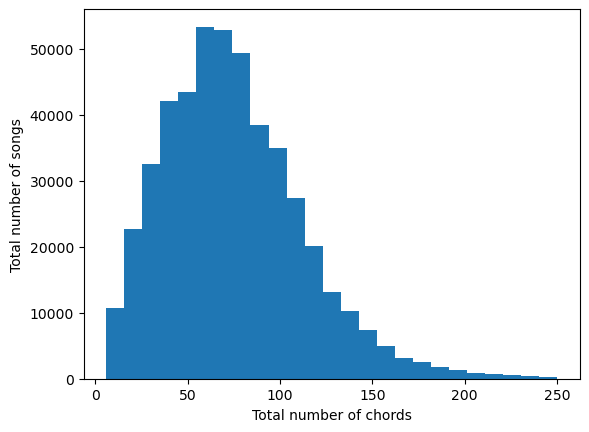

In [64]:
tchords=df[df['tot_chords']<=250].tot_chords.value_counts()
print(tchords)
print(tchords.sum()) #accounts for more than 99.5% data
#plt.bar(tchords.index,uchords)
plt.hist(df[df['tot_chords']<=250]['tot_chords'],bins=25)
plt.xlabel('Total number of chords')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

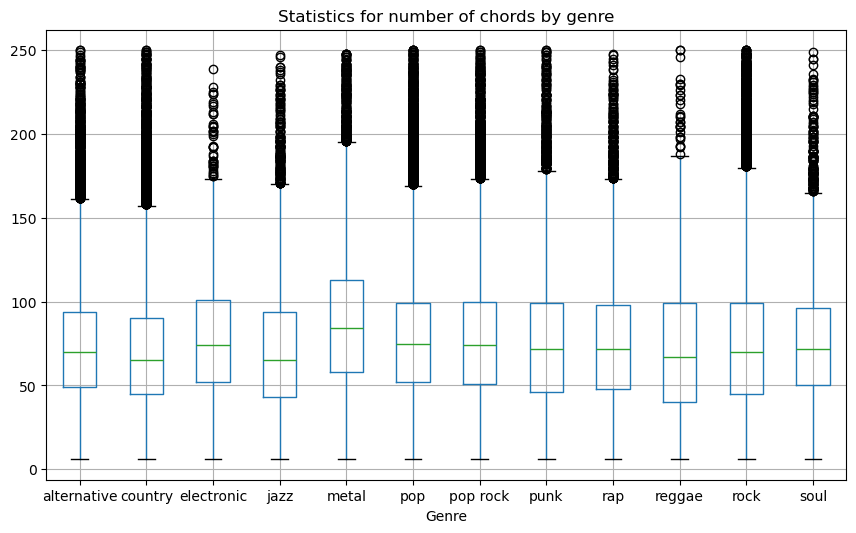

In [65]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of chords by genre')
plt.show()

In [66]:
#mean number of chords per genre
df[['tot_chords','main_genre']].groupby('main_genre').mean()

,tot_chords
main_genre,
alternative,75.181654
country,71.409253
electronic,78.902491
jazz,73.299869
metal,91.722434
pop,79.564104
pop rock,81.427591
punk,78.520741
rap,77.215479


Metal again jumps out as having the highest statistics.

<Figure size 640x480 with 0 Axes>

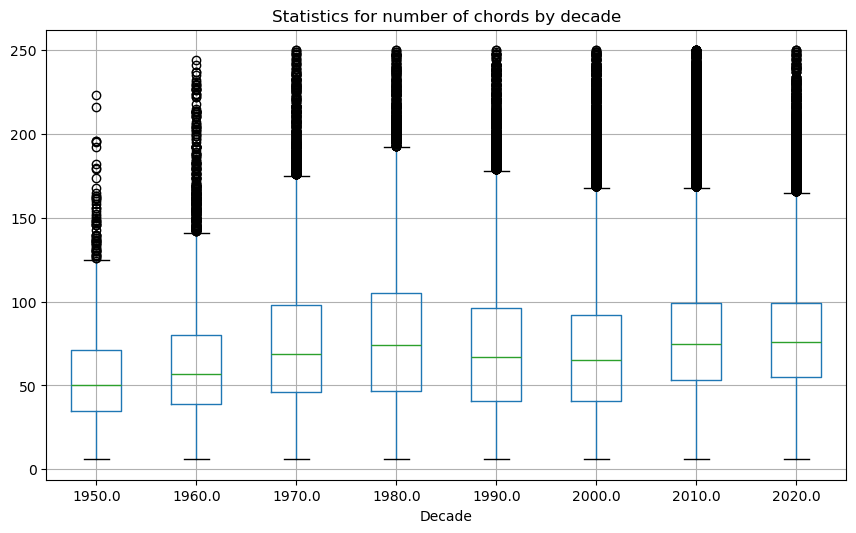

In [67]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of chords by decade')
plt.show()

In [68]:
#mean number of chords per decade
df[['tot_chords','decade']].groupby('decade').mean()

,tot_chords
decade,
1950.0,56.935281
1960.0,64.006137
1970.0,77.132272
1980.0,81.093805
1990.0,73.465126
2000.0,70.430942
2010.0,78.758292
2020.0,79.950621


The interquartile distributions and means of total number of chords seem to be steadily rising since the 1950's.

### Songs per unique chord density: ####

count    477450.000000
mean          0.111315
std           0.084649
min           0.005435
25%           0.059406
50%           0.086957
75%           0.133333
max           1.000000
Name: unique_chord_density, dtype: float64


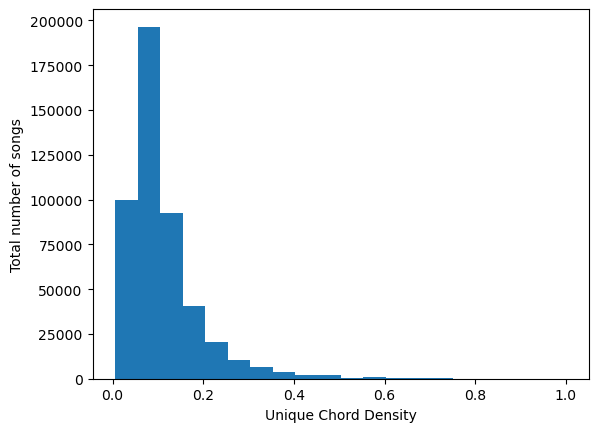

In [69]:
plt.hist(df.unique_chord_density,bins=20)
print(df.unique_chord_density.describe())
plt.xlabel('Unique Chord Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

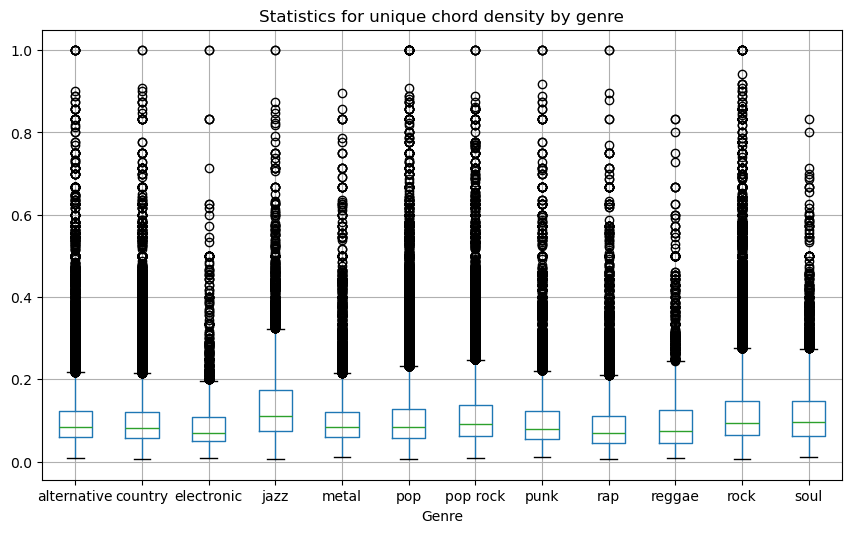

In [70]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_chord_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique chord density by genre')
plt.show()

In [71]:
#mean number of chords per decade
df[['unique_chord_density','main_genre']].groupby('main_genre').mean()

,unique_chord_density
main_genre,
alternative,0.104088
country,0.102143
electronic,0.095845
jazz,0.140460
metal,0.104605
pop,0.106333
pop rock,0.114770
punk,0.106332
rap,0.094922


Jazz is far ahead of the others in terms of mean and interquartile distribution

<Figure size 640x480 with 0 Axes>

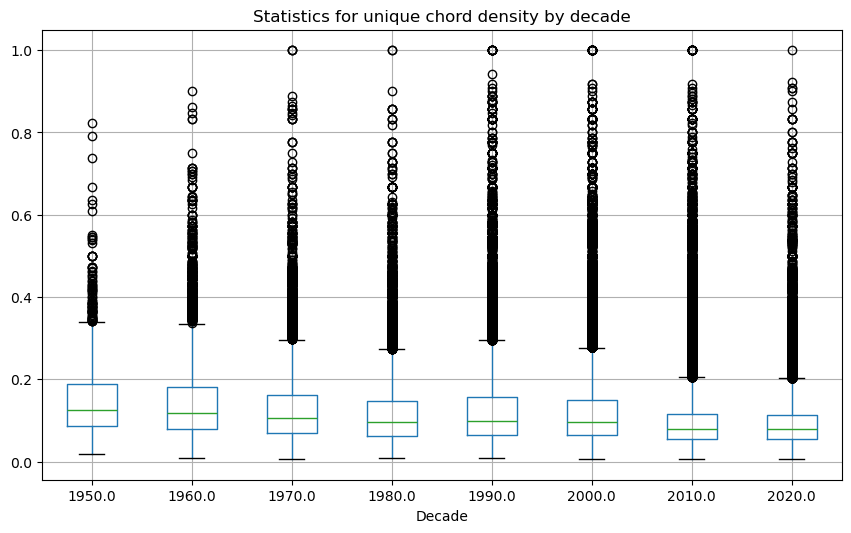

In [72]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_chord_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique chord density by decade')
plt.show()

In [73]:
#mean number of chords per decade
df[['unique_chord_density','decade']].groupby('decade').mean()

,unique_chord_density
decade,
1950.0,0.150346
1960.0,0.144998
1970.0,0.130337
1980.0,0.120204
1990.0,0.128636
2000.0,0.123848
2010.0,0.097363
2020.0,0.095659


The mean and interquartile distributions seem to generally be shifting lower over time since the 1940's.

### TL;DR: ### 
For unique 2,3,4 and 5-gram density analyses (and 2-gram density difference), the decade split results are all similar to unique chord density. The genre-split results are mostly similar too, with differences starting to emerge at n=4 or 5. So only one or two of these might be useful features.

##### Songs per unique 2-gram density: ####

count    477450.000000
mean          0.202177
std           0.135831
min           0.005435
25%           0.108696
50%           0.166667
75%           0.255319
max           0.981481
Name: unique_2gram_density, dtype: float64


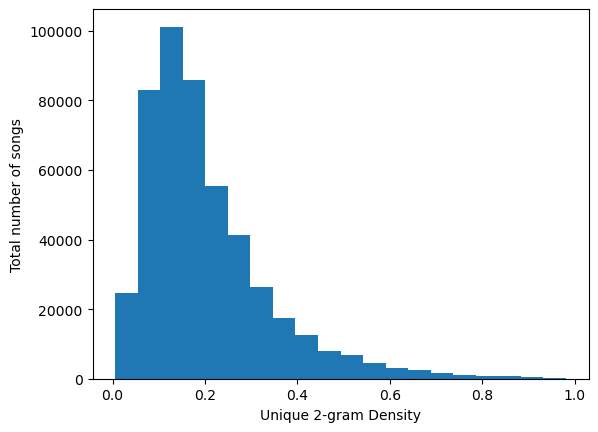

In [74]:
plt.hist(df.unique_2gram_density,bins=20)
print(df.unique_2gram_density.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

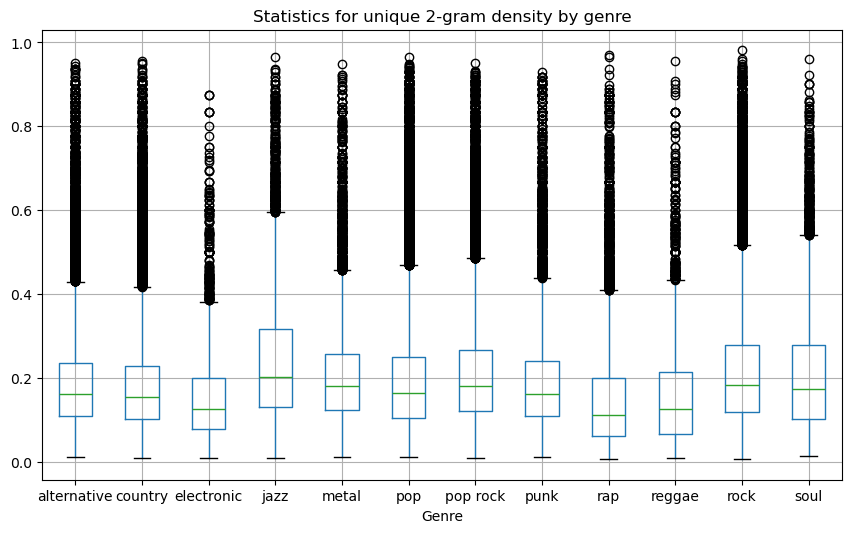

In [75]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by genre')
plt.show()

In [76]:
#mean unique 2-gram density per genre
df[['unique_2gram_density','main_genre']].groupby('main_genre').mean()

,unique_2gram_density
main_genre,
alternative,0.189382
country,0.185162
electronic,0.161278
jazz,0.244620
metal,0.206564
pop,0.195345
pop rock,0.212499
punk,0.195177
rap,0.154129


Again, jazz sticks typically has higher statistics, electronic and rap have lower statistics.

<Figure size 640x480 with 0 Axes>

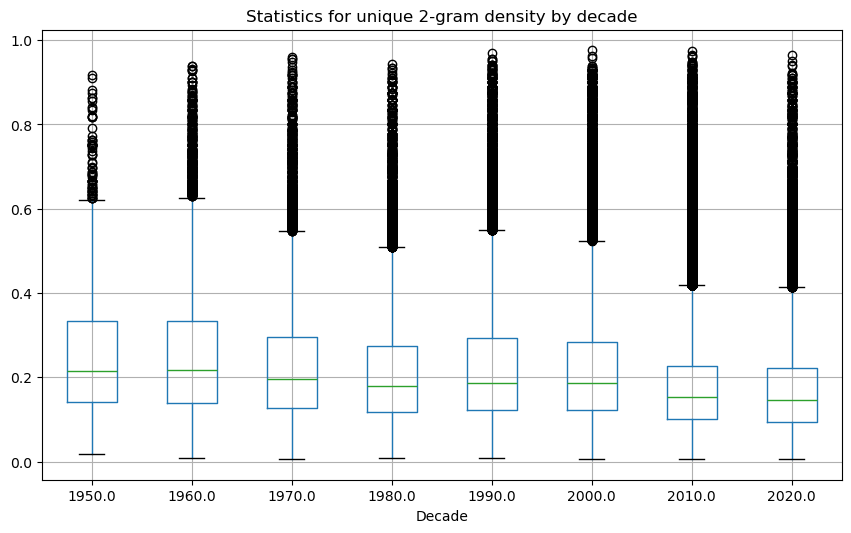

In [77]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by decade')
plt.show()

In [78]:
#mean unique 2-gram density per decade
df[['unique_2gram_density','decade']].groupby('decade').mean()

,unique_2gram_density
decade,
1950.0,0.259900
1960.0,0.254243
1970.0,0.230747
1980.0,0.216558
1990.0,0.228790
2000.0,0.223265
2010.0,0.180448
2020.0,0.174764


Still appears to be a bit of a downward trend over time.

##### Songs per unique 3-gram density: ####

count    477450.000000
mean          0.272893
std           0.166755
min           0.005435
25%           0.151515
50%           0.238806
75%           0.356164
max           0.981481
Name: unique_3gram_density, dtype: float64


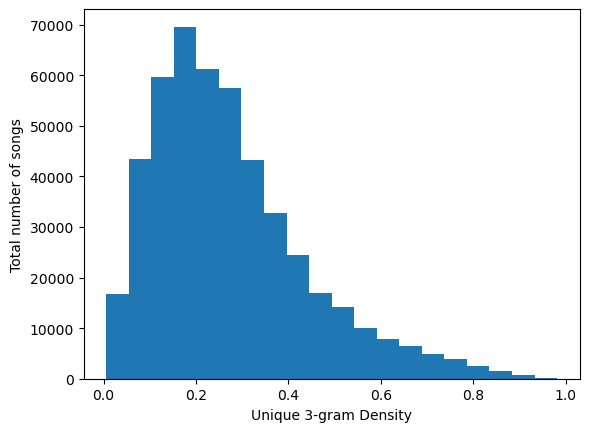

In [79]:
plt.hist(df.unique_3gram_density,bins=20)
print(df.unique_3gram_density.describe())
plt.xlabel('Unique 3-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

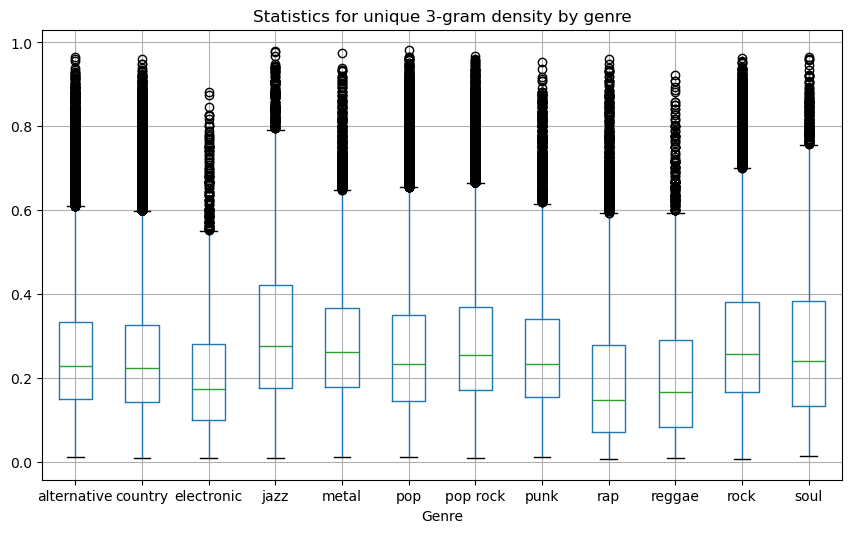

In [80]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_3gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by genre')
plt.show()

In [81]:
#mean unique 3-gram density per genre
df[['unique_3gram_density','main_genre']].groupby('main_genre').mean()

,unique_3gram_density
main_genre,
alternative,0.258356
country,0.254826
electronic,0.213559
jazz,0.318477
metal,0.287569
pop,0.264837
pop rock,0.286779
punk,0.265666
rap,0.200451


Again, jazz has highest statistics and electronic, rap and reggae have the lowest.

<Figure size 640x480 with 0 Axes>

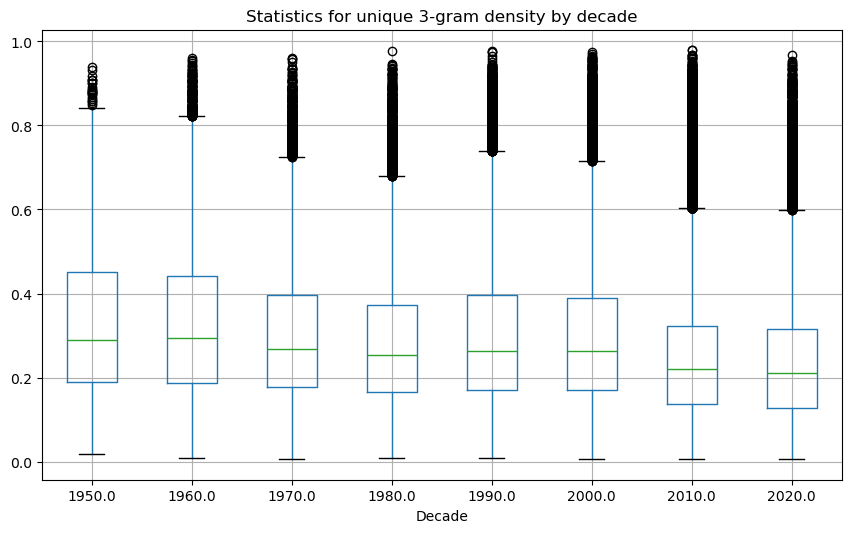

In [82]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_3gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by decade')
plt.show()

In [83]:
#mean unique 3-gram density per decade
df[['unique_3gram_density','decade']].groupby('decade').mean()

,unique_3gram_density
decade,
1950.0,0.336754
1960.0,0.331412
1970.0,0.303722
1980.0,0.288761
1990.0,0.302856
2000.0,0.298050
2010.0,0.248354
2020.0,0.239280


Same gradual downward trend.

##### Songs per unique 4-gram density: ####

count    477450.000000
mean          0.328872
std           0.185361
min           0.005435
25%           0.190476
50%           0.300000
75%           0.437500
max           0.984772
Name: unique_4gram_density, dtype: float64


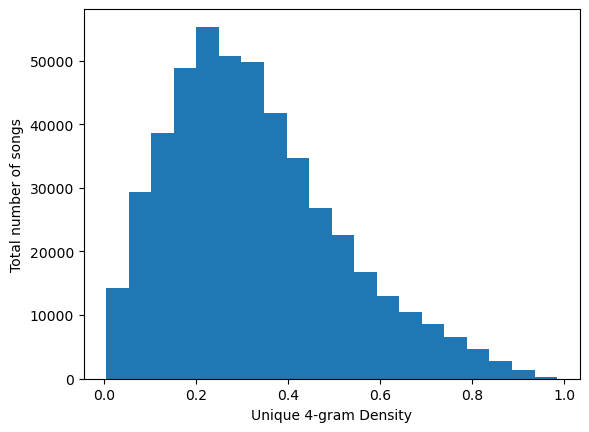

In [84]:
plt.hist(df.unique_4gram_density,bins=20)
print(df.unique_4gram_density.describe())
plt.xlabel('Unique 4-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

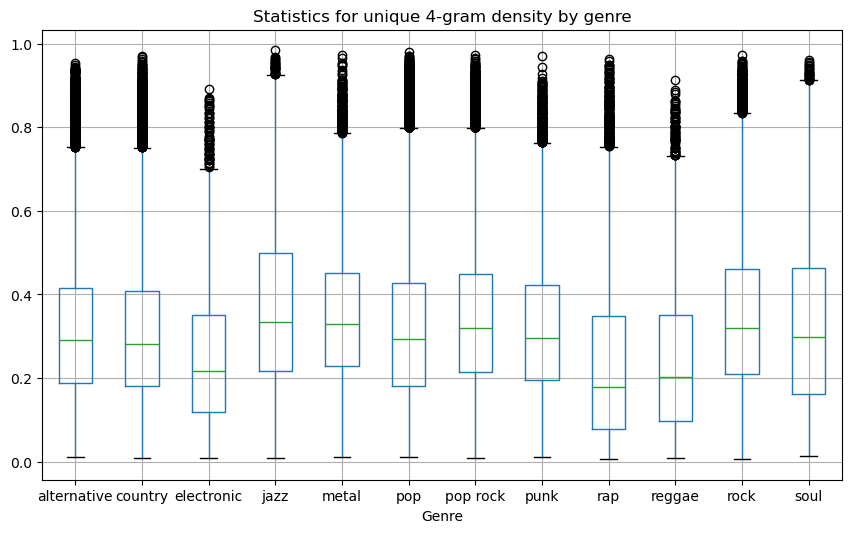

In [85]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_4gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by genre')
plt.show()

In [86]:
#mean unique 4-gram density per genre
df[['unique_4gram_density','main_genre']].groupby('main_genre').mean()

,unique_4gram_density
main_genre,
alternative,0.315108
country,0.311662
electronic,0.256881
jazz,0.372522
metal,0.351159
pop,0.320136
pop rock,0.345027
punk,0.322640
rap,0.237927


Metal starting to rival jazz at the top, with electronic, rap and reggae still the lowest.

<Figure size 640x480 with 0 Axes>

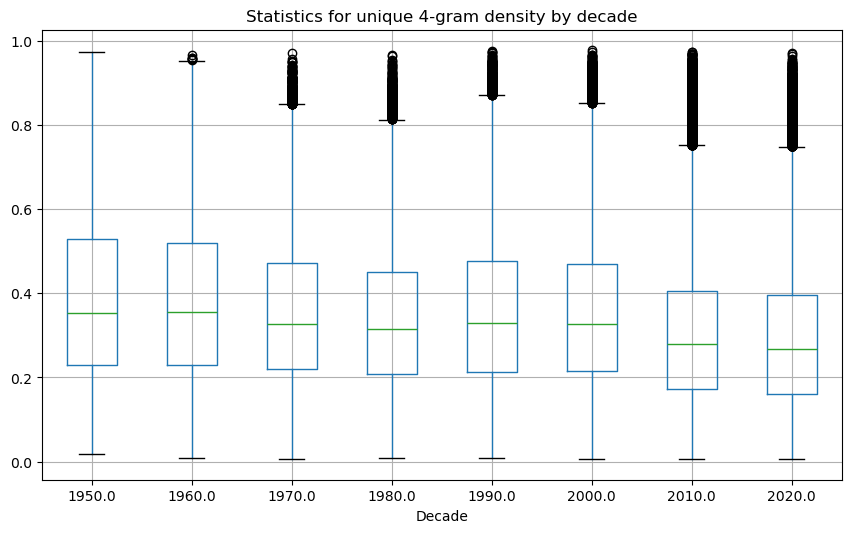

In [87]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_4gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by decade')
plt.show()

In [88]:
#mean unique 4-gram density per decade
df[['unique_4gram_density','decade']].groupby('decade').mean()

,unique_4gram_density
decade,
1950.0,0.391118
1960.0,0.387454
1970.0,0.358938
1980.0,0.344394
1990.0,0.358941
2000.0,0.355691
2010.0,0.304131
2020.0,0.292914


Same general trend.

##### Songs per unique 5-gram density: ####

count    477450.000000
mean          0.373253
std           0.196323
min           0.005435
25%           0.226415
50%           0.352941
75%           0.500000
max           0.979695
Name: unique_5gram_density, dtype: float64


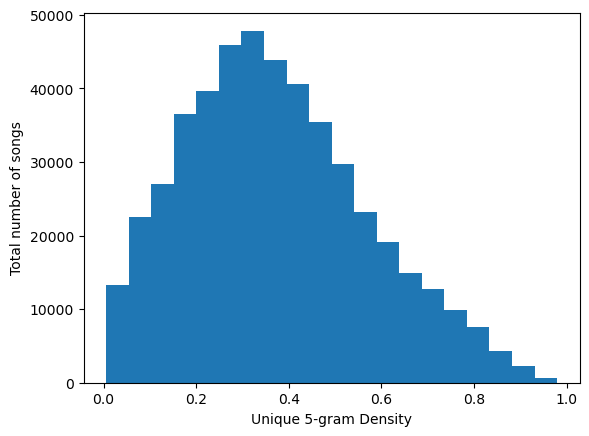

In [89]:
plt.hist(df.unique_5gram_density,bins=20)
print(df.unique_5gram_density.describe())
plt.xlabel('Unique 5-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

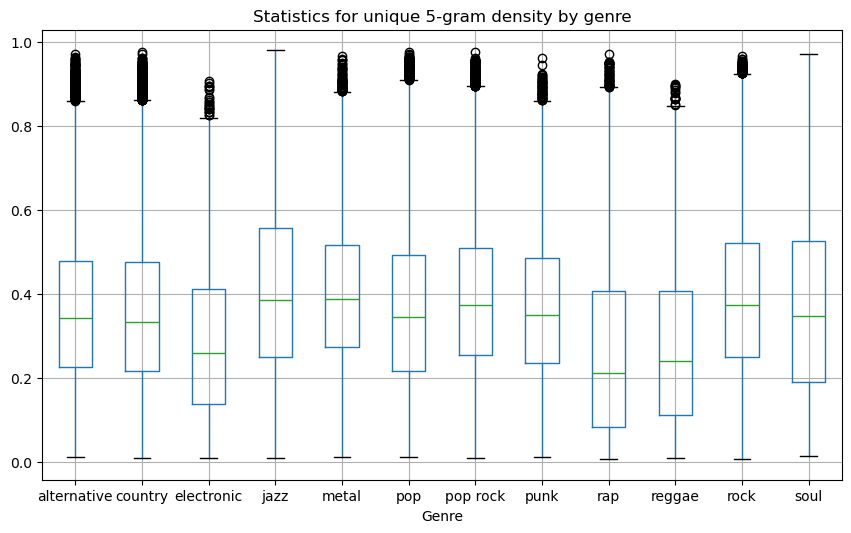

In [90]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_5gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by genre')
plt.show()

In [91]:
#mean unique 5-gram density per genre
df[['unique_5gram_density','main_genre']].groupby('main_genre').mean()

,unique_5gram_density
main_genre,
alternative,0.361422
country,0.357119
electronic,0.292702
jazz,0.412875
metal,0.401602
pop,0.364421
pop rock,0.391167
punk,0.368039
rap,0.268107


Rap, reggae and electronic still clearly the lowest.

<Figure size 640x480 with 0 Axes>

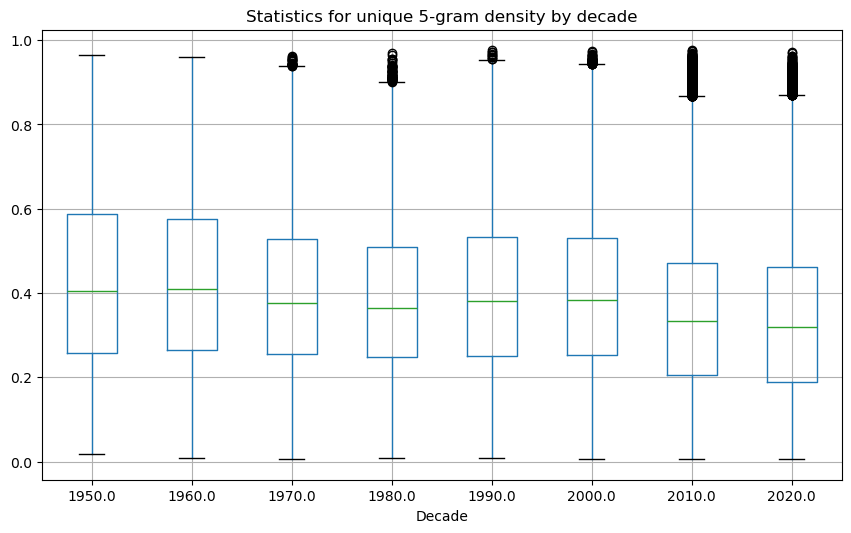

In [92]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_5gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by decade')
plt.show()

In [93]:
#mean unique 5-gram density per decade
df[['unique_5gram_density','decade']].groupby('decade').mean()

,unique_5gram_density
decade,
1950.0,0.430679
1960.0,0.428600
1970.0,0.401110
1980.0,0.388061
1990.0,0.401491
2000.0,0.400102
2010.0,0.349710
2020.0,0.337362


Same tend.

#### Songs by unique 2-gram difference ####

count    477450.000000
mean          0.090862
std           0.068782
min          -0.166667
25%           0.042373
50%           0.076923
75%           0.123288
max           0.600000
Name: unique_2gram_difference, dtype: float64


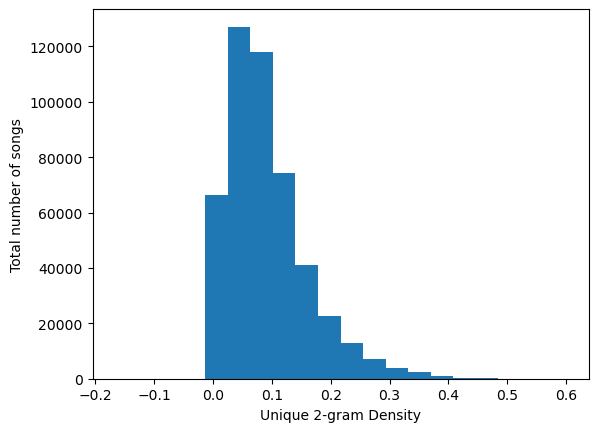

In [94]:
plt.hist(df.unique_2gram_difference,bins=20)
print(df.unique_2gram_difference.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

Songs with density -.2 represent those exactly 5 chords long; might remove these from data later.

<Figure size 640x480 with 0 Axes>

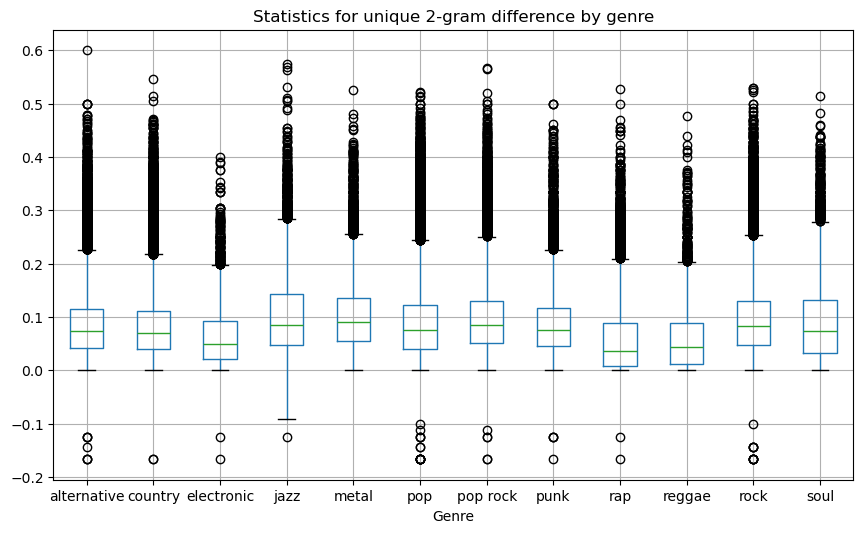

In [95]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_difference',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by genre')
plt.show()

In [96]:
#mean unique 2-gram  difference density per genre
df[['unique_2gram_difference','main_genre']].groupby('main_genre').mean()

,unique_2gram_difference
main_genre,
alternative,0.085293
country,0.083020
electronic,0.065433
jazz,0.104160
metal,0.101959
pop,0.089012
pop rock,0.097729
punk,0.088845
rap,0.059207


Rap, reggae and electronic clearly the lowest statistics.

<Figure size 640x480 with 0 Axes>

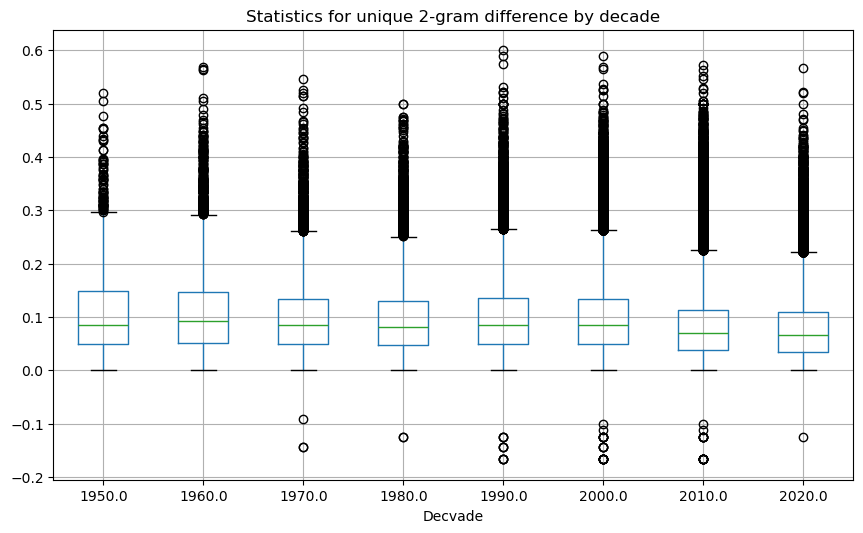

In [97]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_difference',by='decade',figsize=(10,6))
plt.xlabel('Decvade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by decade')
plt.show()

In [98]:
#mean unique 2-gram  difference density per decade
df[['unique_2gram_difference','decade']].groupby('decade').mean()

,unique_2gram_difference
decade,
1950.0,0.109554
1960.0,0.109246
1970.0,0.100410
1980.0,0.096354
1990.0,0.100154
2000.0,0.099417
2010.0,0.083084
2020.0,0.079106


Again, a seemingly downward trend over time.

### Pairplots ###

In [99]:
import seaborn as sns

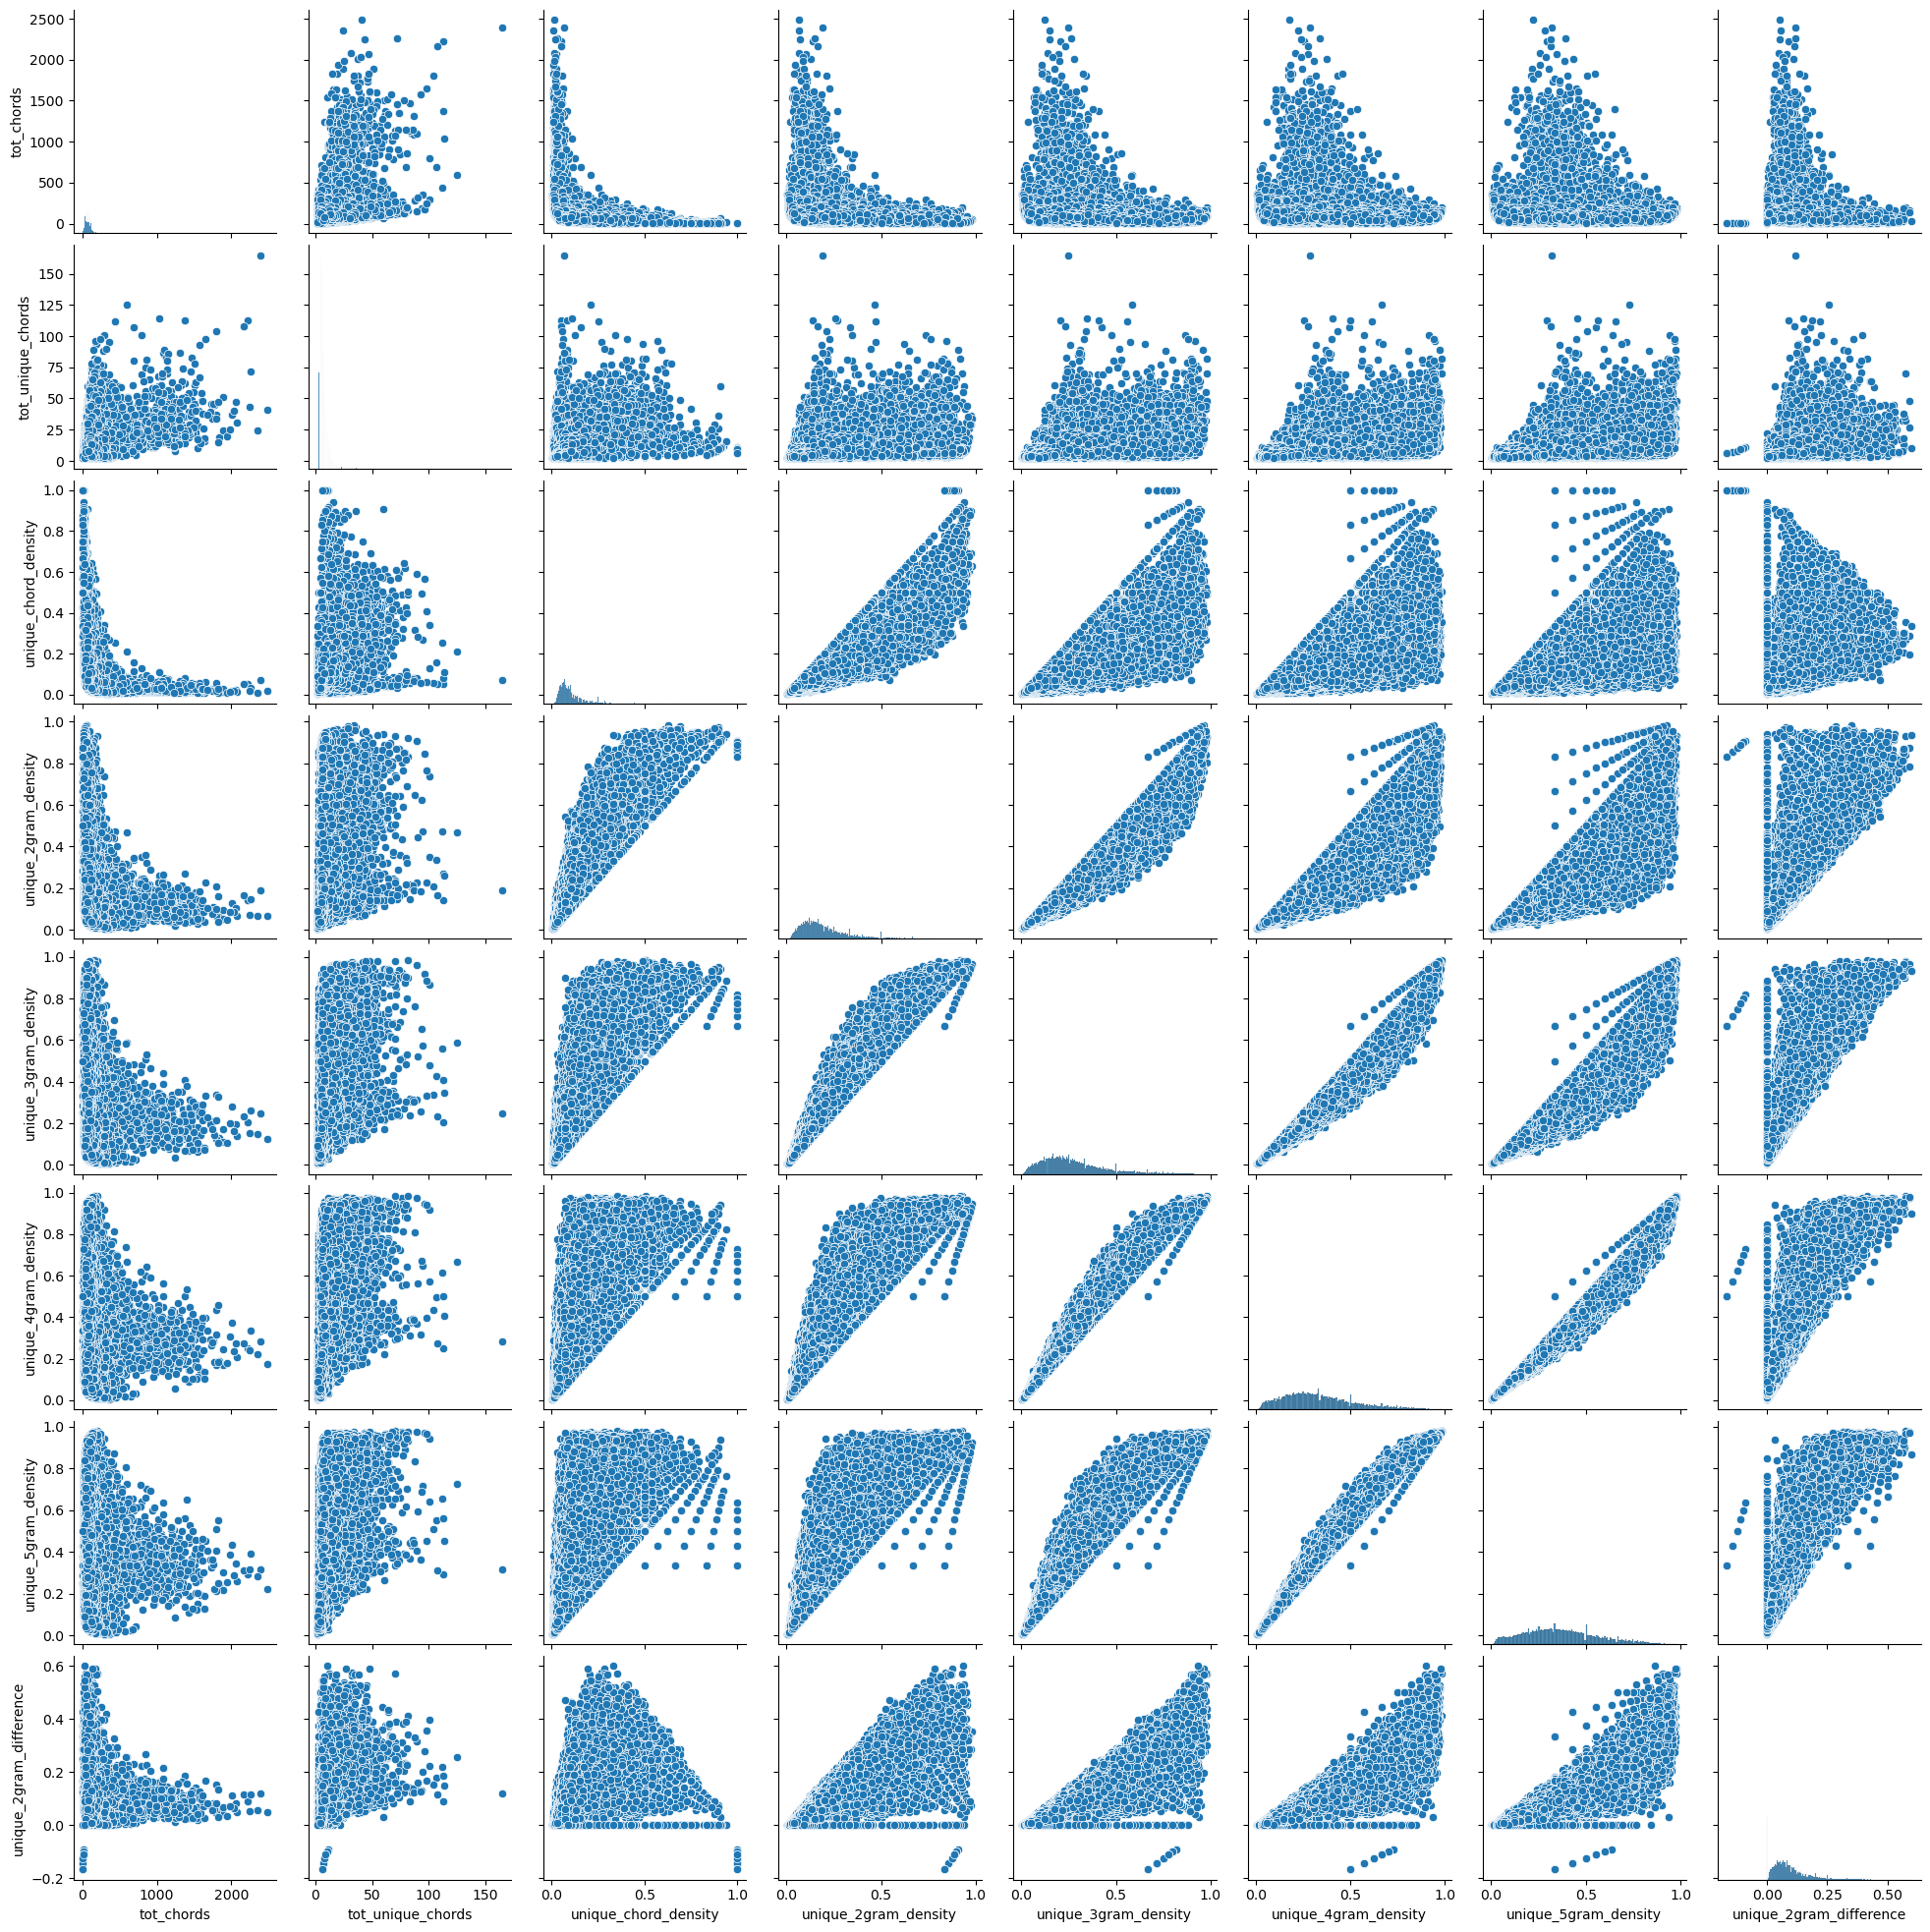

In [100]:
sns.pairplot(data = df,
                x_vars = ['tot_chords','tot_unique_chords','unique_chord_density',
                          'unique_2gram_density','unique_3gram_density','unique_4gram_density',
                          'unique_5gram_density','unique_2gram_difference'],
                y_vars = ['tot_chords','tot_unique_chords','unique_chord_density',
                          'unique_2gram_density','unique_3gram_density','unique_4gram_density',
                          'unique_5gram_density','unique_2gram_difference'])
plt.show()

4 and 5-gram density seem to be the most strongly linearly correlated. Additionally, unique chord density seems to have a decaying exponential dependence on total number of chords, which makes sense; as the total number of chords increases, the fraction of unique chords to total chords should generally decrease. The plots show that generally, the number of unique n grams is larger than the number of unique n-1 grams. The strange linear finger-like features that defy this rule are due to songs where every chord is unique (so they could give wonky results in the dataset). In this scenario, the unique chord density and unique n-gram density are perfectly correlated.